# Experiment 2

Hypothesis: for the same per-agent probing budget,
allocating prefixes to agents based on an adaptive approach
(with the possibility of a prefix to be probed from any number from 0 to n agents)
will allow more to be discovered than allocating prefixes to agents randomly
(with each prefix being probed from precisely one agent).

In [11]:
from pathlib import Path

exp_dir = Path("./resources/data/measurements/pilot_ya_exp2_10/")
# with (exp_dir / "adaptive.txt").open("r") as fd:
#     adaptive_uuids = fd.readlines()
with (exp_dir / "adaptive.txt").open("r") as fd:
    adaptive_no_bgp_uuids = fd.readlines()
# with (exp_dir / "exploration.txt").open("r") as fd:
#     exploration_uuids = fd.readlines()
with (exp_dir / "exploration.txt").open("r") as fd:
    exploration_no_bgp_uuids = fd.readlines()
with (exp_dir / "shared.txt").open("r") as fd:
    shared_uuids = fd.readlines()
with (exp_dir / "adaptive_shared.txt").open("r") as fd:
    shared_adaptive_uuids = fd.readlines()

## Links

In [12]:
from clickhouse_driver import Client
from diamond_miner.queries import AddrType, GetLinks

database_name = "iris"
database_url = f"clickhouse://localhost/{database_name}"

def get_links(measurement_uuid):
    tables = Client.from_url(database_url).execute_iter(
        f"SHOW TABLES FROM {database_name} LIKE "
        f"'results__{measurement_uuid.replace('-', '_')}%'"
    )
    tables = [table[0] for table in tables]
    measurement_ids = ["__".join(table.split("__")[1:]) for table in tables]

    distinct_links = set()
    for measurement_id in measurement_ids:
        for link in GetLinks(
            addr_type=AddrType.FixedString
        ).execute_iter(database_url, measurement_id):
            distinct_links.add(link) 
    return distinct_links

In [13]:
# adaptive_n_links = []
# for uuid in adaptive_uuids:
#     adaptive_n_links.append(len(get_links(uuid.strip())))
adaptive_no_bgp_n_links = []
for uuid in adaptive_no_bgp_uuids:
    adaptive_no_bgp_n_links.append(len(get_links(uuid.strip())))
# exploration_n_links = []
# for uuid in exploration_uuids:
#     exploration_n_links.append(len(get_links(uuid.strip())))
exploration_no_bgp_n_links = []
for uuid in exploration_no_bgp_uuids:
    exploration_no_bgp_n_links.append(len(get_links(uuid.strip())))
shared_n_links = []
for uuid in shared_uuids:
    shared_n_links.append(len(get_links(uuid.strip())))
shared_adaptive_n_links = []
for uuid in shared_adaptive_uuids:
    shared_adaptive_n_links.append(len(get_links(uuid.strip())))

# print(adaptive_n_links)
print(adaptive_no_bgp_n_links)
# print(exploration_n_links)
print(exploration_no_bgp_n_links)
print(shared_n_links)
print(shared_adaptive_n_links)

[51173, 65829, 71900, 75401, 76972, 77503, 78169, 78950, 79167, 78739, 78453, 79345, 77555, 79077, 79184, 78819, 79388, 79544, 79558, 79369]
[50699, 49576, 50426, 51399, 50588, 51929, 50838, 49840, 53321, 52005, 49397, 51098, 51043, 54518, 52210, 52156, 52355, 49322, 55200, 51945]
[61646, 61658, 61738, 61554, 61660, 61392, 61455, 61622, 60903, 61634, 61290, 61394, 61518, 61799, 61412, 60785, 61647, 61593, 61628, 61404]
[61598, 65369, 67437, 68325, 70323, 68401, 69264, 69300, 68613, 69432, 68993, 67909, 69627, 69812, 69483, 68594, 71443, 69561, 69418, 69646]


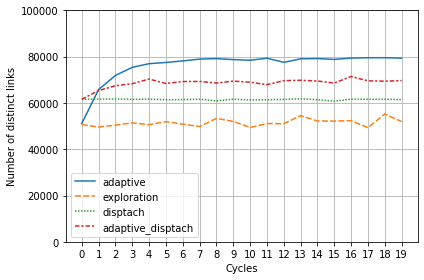

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

data = pd.DataFrame({
    # "adaptive": adaptive_n_links,
    "adaptive": adaptive_no_bgp_n_links,
    # "exploration": exploration_n_links,
    "exploration": exploration_no_bgp_n_links,
    "disptach": shared_n_links,
    "adaptive_disptach": shared_adaptive_n_links,
})

ax = sns.lineplot(data=data)

ax.set(xlabel="Cycles", ylabel="Number of distinct links")
ax.set(ylim=(0, 100_000))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid()

plt.tight_layout()
plt.savefig("./resources/figures/exp2_links.pdf")
plt.show()

## Nodes

In [15]:
from clickhouse_driver import Client
from diamond_miner.queries import AddrType, GetNodes

database_name = "iris"
database_url = f"clickhouse://localhost/{database_name}"

def get_nodes(measurement_uuid):
    tables = Client.from_url(database_url).execute_iter(
        f"SHOW TABLES FROM {database_name} LIKE "
        f"'results__{measurement_uuid.replace('-', '_')}%'"
    )
    tables = [table[0] for table in tables]
    measurement_ids = ["__".join(table.split("__")[1:]) for table in tables]

    distinct_nodes = set()
    for measurement_id in measurement_ids:
        for node in GetNodes(
            addr_type=AddrType.FixedString
        ).execute_iter(database_url, measurement_id):
            distinct_nodes.add(node) 
    return distinct_nodes

In [23]:
# adaptive_n_nodes = []
# for uuid in adaptive_uuids:
#     adaptive_n_nodes.append(len(get_nodes(uuid.strip())))
adaptive_no_bgp_n_nodes = []
for uuid in adaptive_no_bgp_uuids:
    adaptive_no_bgp_n_nodes.append(len(get_nodes(uuid.strip())))
# exploration_n_nodes = []
# for uuid in exploration_uuids:
#     exploration_n_nodes.append(len(get_nodes(uuid.strip())))
exploration_no_bgp_n_nodes = []
for uuid in exploration_no_bgp_uuids:
    exploration_no_bgp_n_nodes.append(len(get_nodes(uuid.strip())))
shared_n_nodes = []
for uuid in shared_uuids:
    shared_n_nodes.append(len(get_nodes(uuid.strip())))
shared_adaptive_n_nodes = []
for uuid in shared_adaptive_uuids:
    shared_adaptive_n_nodes.append(len(get_nodes(uuid.strip())))

# print(adaptive_n_nodes)
print(adaptive_no_bgp_n_nodes)
# print(exploration_n_nodes)
print(exploration_no_bgp_n_nodes)
print(shared_n_nodes)
print(shared_adaptive_n_nodes)

[31146, 40027, 42830, 44600, 45440, 45709, 46104, 46531, 46704, 46582, 46591, 46768, 46576, 46729, 46735, 46718, 46808, 46815, 46824, 46774]
[31400, 30367, 30825, 31894, 30729, 31771, 31623, 31116, 33292, 32761, 30716, 31506, 31147, 33973, 32339, 31679, 31868, 29552, 33956, 31523]
[38700, 38578, 38626, 38615, 38707, 38686, 38592, 38723, 38560, 38709, 38663, 38736, 38649, 38845, 38664, 38569, 38584, 38757, 38707, 38620]
[38697, 40431, 41369, 41800, 41517, 42092, 42258, 42265, 42073, 42328, 42292, 42229, 42395, 42421, 42346, 42303, 42295, 42352, 42256, 42406]


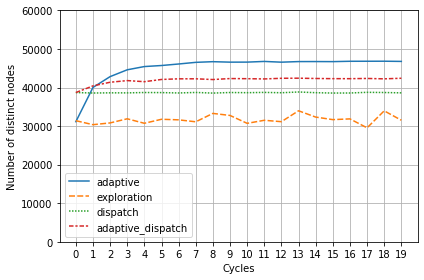

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

data = pd.DataFrame({
    # "adaptive": adaptive_n_nodes,
    "adaptive": adaptive_no_bgp_n_nodes,
    # "exploration": exploration_n_nodes,
    "exploration": exploration_no_bgp_n_nodes,
    "dispatch": shared_n_nodes,
    "adaptive_dispatch": shared_adaptive_n_nodes,
    
})

ax = sns.lineplot(data=data)

ax.set(xlabel="Cycles", ylabel="Number of distinct nodes")
ax.set(ylim=(0, 60_000))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid()

plt.tight_layout()
plt.savefig("./resources/figures/exp2_nodes.pdf")
plt.show()

## Probes

In [18]:
import requests 

url = "https://iris.dioptra.io/api"
username = "admin"
password = "***REMOVED***"

def get_token(url, username, password):
    res = requests.post(
        url + "/profile/token",
        data={
            "username": username,
            "password": password,
        },
    )
    return {"Authorization": f"Bearer {res.json()['access_token']}"}

def get_statistic(measurement_uuid, statistic):    
    headers=get_token(url, username, password)
    data = requests.get(url + f"/measurements/{measurement_uuid}", headers=headers)

    packets_sent = 0
    for agent in data.json()["agents"]:
        for probing_round in agent["probing_statistics"]:
            packets_sent += probing_round["statistics"].get(statistic, 0)
    return packets_sent

In [27]:
# adaptive_n_probes = []
# for uuid in adaptive_uuids:
#     adaptive_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))
adaptive_no_bgp_n_probes = []
for uuid in adaptive_no_bgp_uuids:
    adaptive_no_bgp_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))
# exploration_n_probes = []
# for uuid in exploration_uuids:
#     exploration_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))
exploration_no_bgp_n_probes = []
for uuid in exploration_no_bgp_uuids:
    exploration_no_bgp_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))
shared_n_probes = []
for uuid in shared_uuids:
    shared_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))
shared_adaptive_n_probes = []
for uuid in shared_adaptive_uuids:
    shared_adaptive_n_probes.append(get_statistic(uuid.strip(), "packets_sent"))

# print(adaptive_n_probes)
print(adaptive_no_bgp_n_probes)
# print(exploration_n_probes)
print(exploration_no_bgp_n_probes)
print(shared_n_probes)
print(shared_adaptive_n_probes)

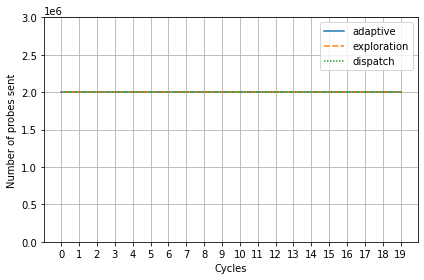

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

data = pd.DataFrame({
    # "adaptive": adaptive_n_probes,
    "adaptive": adaptive_no_bgp_n_probes,
    # "exploration": exploration_n_probes,
    "exploration": exploration_no_bgp_n_probes,
    "dispatch": shared_n_probes,
    "adaptive_dispatch": shared_adaptive_n_probes,
})

ax = sns.lineplot(data=data)

ax.set(xlabel="Cycles", ylabel="Number of probes sent")
ax.set(ylim=(0, 3_000_000))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid()

plt.tight_layout()
plt.savefig("./resources/figures/exp2_probes.pdf")
plt.show()